NBA analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns

In [3]:
nba_22 = pd.read_csv(
    '2022_advanced_box.csv')

nba_22.head(3)

,Team,Match Up,Game Date,W/L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OKC,OKC @ LAC,4/10/2022,L,48.0,88.9,139.4,-50.5,45.9,1.70,13,23.8,65.9,41.1,10.1,42.3,43.2,99.0,24.9
2,MIL,MIL @ CLE,4/10/2022,L,48.0,109.5,127.9,-18.4,69.2,2.25,18.9,23.1,77.8,48.5,11.4,51.1,56.3,104.5,43.5


In [4]:
# Change column name
nba_22['AST_RATIO'] = nba_22['AST']
nba_22.head()

,Team,Match Up,Game Date,W/L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,AST_RATIO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ratio
1,OKC,OKC @ LAC,4/10/2022,L,48.0,88.9,139.4,-50.5,45.9,1.70,13,23.8,65.9,41.1,10.1,42.3,43.2,99.0,24.9,13
2,MIL,MIL @ CLE,4/10/2022,L,48.0,109.5,127.9,-18.4,69.2,2.25,18.9,23.1,77.8,48.5,11.4,51.1,56.3,104.5,43.5,18.9
3,SAS,SAS @ DAL,4/10/2022,L,48.0,120.0,130.0,-10.0,60.5,3.25,19.1,21.7,69.0,44.3,8.0,54.5,60.5,100.0,48.1,19.1
4,MIN,MIN vs. CHI,4/10/2022,L,48.0,116.5,120.4,-3.9,65.2,2.31,20.8,26.1,54.8,39.8,12.6,56.6,59.6,103.0,49.4,20.8


In [5]:
nba_22 = nba_22.dropna()

In [12]:
# Check the pace out by team

team_paces = nba_22.groupby('Team')['PACE'].agg(
    ['count', 'mean', 'std'])
team_paces['std'] = round(team_paces['std'], 1)
team_paces['mean'] = round(team_paces['mean'], 1)
team_paces.sort_values('mean', ascending = False)
team_paces.head()

,count,mean,std
Team,,,
ATL,82,98.7,4.1
BKN,82,99.4,3.5
BOS,82,97.2,3.8
CHA,82,100.5,4.8
CHI,82,98.8,3.5


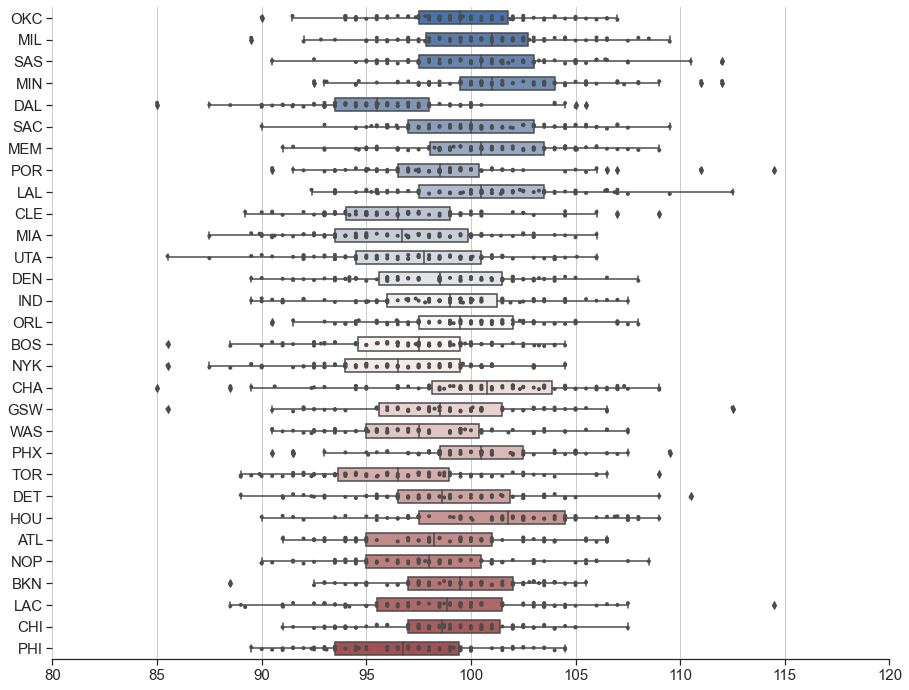

In [11]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1.5)

# Plot with horizontal boxes
sns.boxplot(x="PACE", y="Team", data=nba_22,
            width=.6, palette="vlag")

# Add observations
sns.stripplot(x="PACE", y="Team", data=nba_22,
              size=4, color=".3", linewidth=0)

#Reformat to percent
plt.xlabel('', fontsize = 16)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

# Format
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlim=(80, 120))
plt.title('', fontsize = 20)
sns.despine(trim=True, left=True)

## The next question: Who will win the NBA finals?

Lets assume good finals teams:
Play Good defense
Shoot Well 
Rebound Well
Do not turn the ball over.

### Weight the Metrics
For simplicities' sake, I will weigh these as such:
Good Defense = 30%
Shooting Well = 30%
Rebount Well = 20%
Few Turnovers = 20%



In [13]:
nba_d = pd.read_csv('team_clutch.csv')
nba_d.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,1,Phoenix Suns,42,33,9,130,131.6,98.2,33.4,62.7,2.63,19.8,32.0,70.1,55.0,10.4,64.9,69.3,104.65,74.2
1,2,Toronto Raptors,45,26,19,181,112.3,102.8,9.5,48.1,2.03,12.5,42.9,67.0,54.7,8.7,47.3,52.8,96.63,58.3
2,3,Chicago Bulls,41,25,16,141,121.7,106.4,15.3,39.0,1.64,11.8,29.6,68.1,50.7,9.2,51.8,61.1,102.26,61.3
3,3,Washington Wizards,40,25,15,160,111.1,98.2,12.9,61.9,1.70,16.7,30.4,71.4,52.7,13.4,53.8,59.2,101.04,61.2
4,5,LA Clippers,42,24,18,149,124.1,113.3,10.8,56.1,2.23,16.5,29.3,64.8,48.2,10.0,59.1,64.1,99.73,56.8


In [16]:
nba_d = nba_d.sort_values('DefRtg')
nba_d.head(10)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,1,Phoenix Suns,42,33,9,130,131.6,98.2,33.4,62.7,2.63,19.8,32.0,70.1,55.0,10.4,64.9,69.3,104.65,74.2
3,3,Washington Wizards,40,25,15,160,111.1,98.2,12.9,61.9,1.70,16.7,30.4,71.4,52.7,13.4,53.8,59.2,101.04,61.2
8,8,Golden State Warriors,42,23,19,148,103.3,99.3,4.0,56.9,1.68,15.1,30.4,67.9,49.0,12.3,47.7,53.2,98.47,52.3
9,8,Miami Heat,38,23,15,134,101.1,100.8,0.3,51.2,1.08,12.1,27.4,72.1,49.2,14.4,48.8,55.8,96.30,51.3
5,5,Milwaukee Bucks,41,24,17,122,117.4,101.5,15.9,48.0,1.42,13.7,34.1,73.7,55.0,12.8,54.8,60.4,102.06,59.5
28,27,Orlando Magic,33,13,20,126,98.9,101.9,-3.0,43.6,0.94,10.2,29.0,73.9,53.5,13.6,43.7,53.2,101.39,50.5
14,14,Memphis Grizzlies,32,21,11,126,112.2,102.4,9.8,39.6,1.12,10.4,39.6,63.0,50.7,12.6,46.6,54.1,99.65,55.3
1,2,Toronto Raptors,45,26,19,181,112.3,102.8,9.5,48.1,2.03,12.5,42.9,67.0,54.7,8.7,47.3,52.8,96.63,58.3
10,11,Brooklyn Nets,42,22,20,163,112.7,103.6,9.1,54.9,2.23,14.4,33.1,71.2,51.6,8.9,47.4,54.5,98.95,55.4
23,24,San Antonio Spurs,39,15,24,147,92.7,105.0,-12.3,54.6,1.51,13.1,31.1,62.4,46.3,11.7,41.2,45.8,101.95,37.9


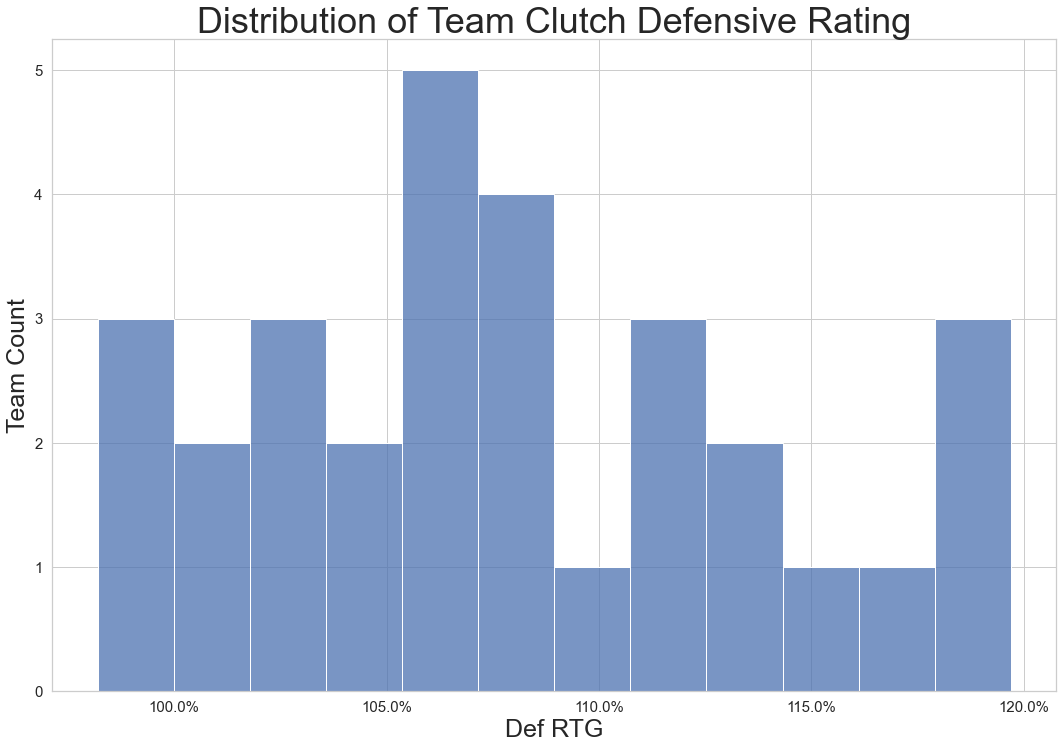

In [25]:
# Plot the Production budgets distribution
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize=(18,12))
sns.set(font_scale = 3)
# Create histogram
sns.histplot(data = nba_d, x="DefRtg", bins = 12)
# Format

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel( "Def RTG", fontsize = 25)
plt.ylabel("Team Count", fontsize=25)
plt.title("Distribution of Team Clutch Defensive Rating")
ax.tick_params(labelsize = 15)

## Defense
The number 1 defense in the clutch is (tied) the Phoenix Suns and the Washington Wizards with 98.2 points given up per 100 posessions. Golden state is not far away with a 99.3 Defensive Rating

In [18]:
# Shooting
nba_d = nba_d.sort_values('eFG%', ascending= False)
nba_d.head(10)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,1,Phoenix Suns,42,33,9,130,131.6,98.2,33.4,62.7,2.63,19.8,32.0,70.1,55.0,10.4,64.9,69.3,104.65,74.2
4,5,LA Clippers,42,24,18,149,124.1,113.3,10.8,56.1,2.23,16.5,29.3,64.8,48.2,10.0,59.1,64.1,99.73,56.8
5,5,Milwaukee Bucks,41,24,17,122,117.4,101.5,15.9,48.0,1.42,13.7,34.1,73.7,55.0,12.8,54.8,60.4,102.06,59.5
3,3,Washington Wizards,40,25,15,160,111.1,98.2,12.9,61.9,1.70,16.7,30.4,71.4,52.7,13.4,53.8,59.2,101.04,61.2
2,3,Chicago Bulls,41,25,16,141,121.7,106.4,15.3,39.0,1.64,11.8,29.6,68.1,50.7,9.2,51.8,61.1,102.26,61.3
27,27,Houston Rockets,31,13,18,118,104.8,110.3,-5.6,53.7,0.90,13.3,32.2,60.7,47.8,19.4,51.6,57.7,104.58,42.8
12,11,Dallas Mavericks,38,22,16,128,108.8,117.8,-9.1,51.0,1.69,14.4,33.1,67.6,49.2,11.6,51.4,55.7,91.93,45.8
13,14,Los Angeles Lakers,47,21,26,209,104.9,108.5,-3.6,51.9,1.44,14.1,31.0,71.2,50.6,13.2,50.7,54.5,99.67,46.2
22,23,Oklahoma City Thunder,38,16,22,147,108.0,110.8,-2.7,57.0,1.81,15.2,25.3,61.7,44.4,11.1,50.6,56.5,106.01,48.3
6,5,Philadelphia 76ers,45,24,21,178,109.7,105.8,3.9,53.5,1.79,14.2,27.9,71.3,50.1,10.5,50.2,56.5,97.46,52.8


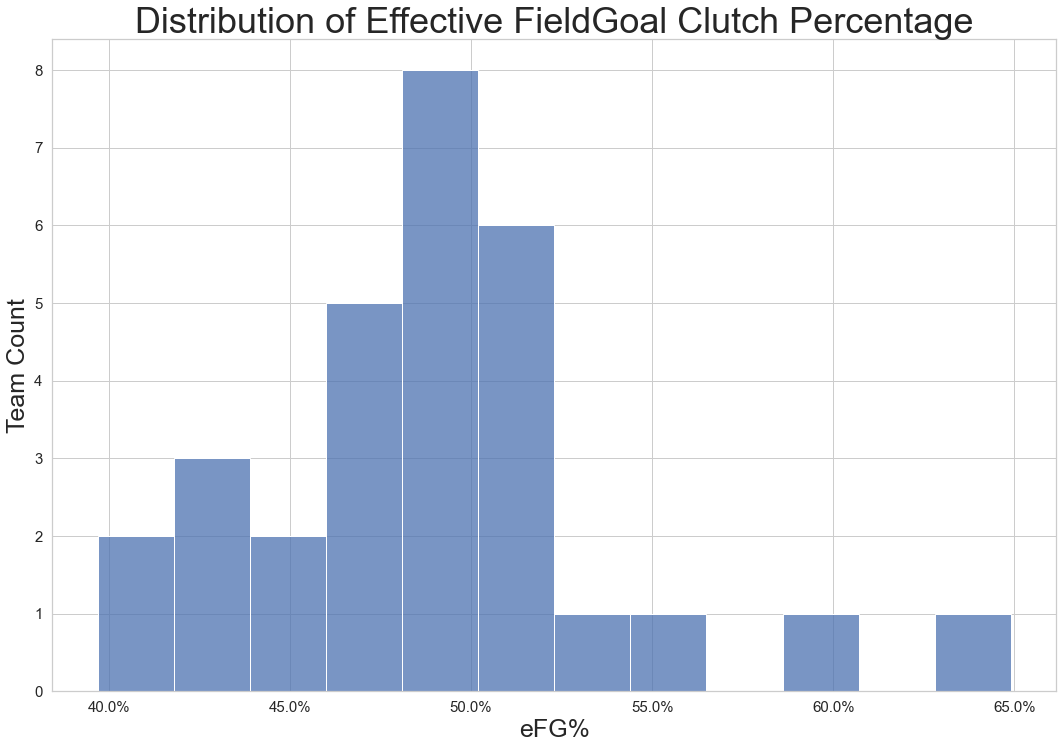

In [23]:
# Plot the Production budgets distribution
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize=(18,12))
sns.set(font_scale = 3)
# Create histogram
sns.histplot(data = nba_d, x="eFG%", bins = 12)
# Format

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel( "eFG%", fontsize = 25)
plt.ylabel("Team Count", fontsize=25)
plt.title("Distribution of Effective FieldGoal Clutch Percentage")
ax.tick_params(labelsize = 15)

## Shooting
The Phoenix Suns once again come in #1 with a 64.9% effective Field Goal percentage. 
On net, Phoenix is far and away the favorite in the clutch. 

In [19]:
# Turnover Percentage 
nba_d = nba_d.sort_values('TOV%')
nba_d.head(10)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
16,17,Charlotte Hornets,37,19,18,163,110.2,113.2,-3.0,65.9,2.89,17.8,25.6,65.6,44.4,8.4,49.3,54.6,98.20,46.1
1,2,Toronto Raptors,45,26,19,181,112.3,102.8,9.5,48.1,2.03,12.5,42.9,67.0,54.7,8.7,47.3,52.8,96.63,58.3
10,11,Brooklyn Nets,42,22,20,163,112.7,103.6,9.1,54.9,2.23,14.4,33.1,71.2,51.6,8.9,47.4,54.5,98.95,55.4
2,3,Chicago Bulls,41,25,16,141,121.7,106.4,15.3,39.0,1.64,11.8,29.6,68.1,50.7,9.2,51.8,61.1,102.26,61.3
4,5,LA Clippers,42,24,18,149,124.1,113.3,10.8,56.1,2.23,16.5,29.3,64.8,48.2,10.0,59.1,64.1,99.73,56.8
17,18,Atlanta Hawks,38,18,20,131,110.6,119.4,-8.8,46.5,1.70,13.0,32.1,70.5,50.9,10.2,48.9,54.7,97.39,42.6
0,1,Phoenix Suns,42,33,9,130,131.6,98.2,33.4,62.7,2.63,19.8,32.0,70.1,55.0,10.4,64.9,69.3,104.65,74.2
6,5,Philadelphia 76ers,45,24,21,178,109.7,105.8,3.9,53.5,1.79,14.2,27.9,71.3,50.1,10.5,50.2,56.5,97.46,52.8
7,8,Denver Nuggets,40,23,17,160,107.8,106.3,1.5,58.0,1.91,14.8,30.5,74.7,52.0,10.6,46.4,54.1,96.15,51.1
21,21,Utah Jazz,40,17,23,142,105.3,112.0,-6.7,53.4,1.72,13.7,30.0,69.3,48.3,10.7,48.6,53.5,100.27,46.2


## Turnover Percentage
The Hornets, Raptors, and Nets lead here. 

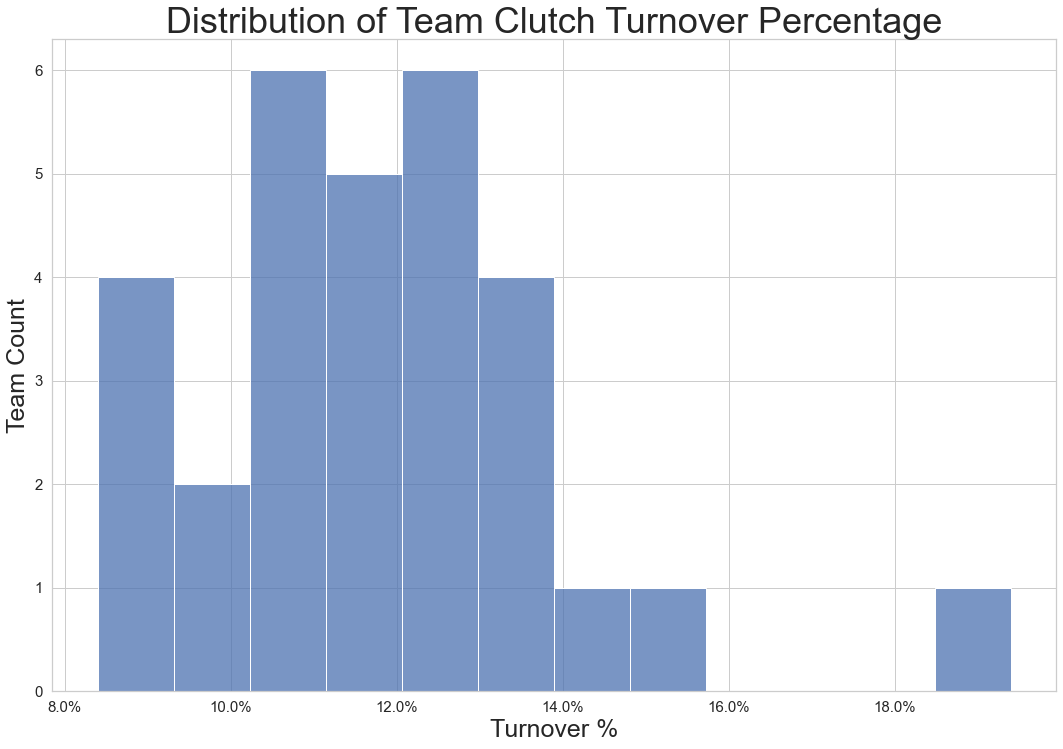

In [22]:
# Plot the Production budgets distribution
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize=(18,12))
sns.set(font_scale = 3)
# Create histogram
sns.histplot(data = nba_d, x="TOV%", bins = 12)
# Format

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel( "Turnover %", fontsize = 25)
plt.ylabel("Team Count", fontsize=25)
plt.title("Distribution of Team Clutch Turnover Percentage")
ax.tick_params(labelsize = 15)

In [33]:
DefRtg_range = nba_d['DefRtg'].max() - nba_d['DefRtg'].min()
DR_min = nba_d['DefRtg'].min()
DefRtg_range

21.5

In [39]:
# Add column to give points for DefRtg, lowest is best:
# Add points by deciles?

nba_d['DefRtgPts'] = pd.qcut(nba_d['DefRtg'], 10, labels = False)
# Low is good for this one

nba_d.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,DefRtgPts,eFG_Pts
16,17,Charlotte Hornets,37,19,18,163,110.2,113.2,-3.0,65.9,...,25.6,65.6,44.4,8.4,49.3,54.6,98.20,46.1,7,5
1,2,Toronto Raptors,45,26,19,181,112.3,102.8,9.5,48.1,...,42.9,67.0,54.7,8.7,47.3,52.8,96.63,58.3,2,3
10,11,Brooklyn Nets,42,22,20,163,112.7,103.6,9.1,54.9,...,33.1,71.2,51.6,8.9,47.4,54.5,98.95,55.4,2,3
2,3,Chicago Bulls,41,25,16,141,121.7,106.4,15.3,39.0,...,29.6,68.1,50.7,9.2,51.8,61.1,102.26,61.3,4,8
4,5,LA Clippers,42,24,18,149,124.1,113.3,10.8,56.1,...,29.3,64.8,48.2,10.0,59.1,64.1,99.73,56.8,8,9


In [38]:
nba_d['eFG_Pts'] = pd.qcut(nba_d['eFG%'], 10, labels = False)

#High is good for this one

nba_d.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,DefRtgPts,eFG_Pts
16,17,Charlotte Hornets,37,19,18,163,110.2,113.2,-3.0,65.9,...,25.6,65.6,44.4,8.4,49.3,54.6,98.20,46.1,7,5
1,2,Toronto Raptors,45,26,19,181,112.3,102.8,9.5,48.1,...,42.9,67.0,54.7,8.7,47.3,52.8,96.63,58.3,2,3
10,11,Brooklyn Nets,42,22,20,163,112.7,103.6,9.1,54.9,...,33.1,71.2,51.6,8.9,47.4,54.5,98.95,55.4,2,3
2,3,Chicago Bulls,41,25,16,141,121.7,106.4,15.3,39.0,...,29.6,68.1,50.7,9.2,51.8,61.1,102.26,61.3,4,8
4,5,LA Clippers,42,24,18,149,124.1,113.3,10.8,56.1,...,29.3,64.8,48.2,10.0,59.1,64.1,99.73,56.8,8,9


In [40]:
nba_d['Reb_pts'] = pd.qcut(nba_d['REB%'], 10, labels = False)

#High is good for this one

nba_d.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,DefRtgPts,eFG_Pts,Reb_pts
16,17,Charlotte Hornets,37,19,18,163,110.2,113.2,-3.0,65.9,...,65.6,44.4,8.4,49.3,54.6,98.20,46.1,7,5,0
1,2,Toronto Raptors,45,26,19,181,112.3,102.8,9.5,48.1,...,67.0,54.7,8.7,47.3,52.8,96.63,58.3,2,3,8
10,11,Brooklyn Nets,42,22,20,163,112.7,103.6,9.1,54.9,...,71.2,51.6,8.9,47.4,54.5,98.95,55.4,2,3,7
2,3,Chicago Bulls,41,25,16,141,121.7,106.4,15.3,39.0,...,68.1,50.7,9.2,51.8,61.1,102.26,61.3,4,8,5
4,5,LA Clippers,42,24,18,149,124.1,113.3,10.8,56.1,...,64.8,48.2,10.0,59.1,64.1,99.73,56.8,8,9,2


In [41]:
nba_d['TO_pts'] = pd.qcut(nba_d['TOV%'], 10, labels = False)
#Low is good for this one

nba_d.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,REB%,TOV%,eFG%,TS%,PACE,PIE,DefRtgPts,eFG_Pts,Reb_pts,TO_pts
16,17,Charlotte Hornets,37,19,18,163,110.2,113.2,-3.0,65.9,...,44.4,8.4,49.3,54.6,98.20,46.1,7,5,0,0
1,2,Toronto Raptors,45,26,19,181,112.3,102.8,9.5,48.1,...,54.7,8.7,47.3,52.8,96.63,58.3,2,3,8,0
10,11,Brooklyn Nets,42,22,20,163,112.7,103.6,9.1,54.9,...,51.6,8.9,47.4,54.5,98.95,55.4,2,3,7,0
2,3,Chicago Bulls,41,25,16,141,121.7,106.4,15.3,39.0,...,50.7,9.2,51.8,61.1,102.26,61.3,4,8,5,1
4,5,LA Clippers,42,24,18,149,124.1,113.3,10.8,56.1,...,48.2,10.0,59.1,64.1,99.73,56.8,8,9,2,1


In [48]:
# Now, lets make the algo column
nba_d['Tot_pts'] = (nba_d['eFG_Pts'] *.3) - (nba_d['DefRtgPts'] * .3) - (nba_d['TO_pts']*.2) + (nba_d['Reb_pts']*.2)
nba_d = nba_d.sort_values('Tot_pts', ascending= False)
nba_d.head(2)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,TOV%,eFG%,TS%,PACE,PIE,DefRtgPts,eFG_Pts,Reb_pts,TO_pts,Tot_pts
0,1,Phoenix Suns,42,33,9,130,131.6,98.2,33.4,62.7,...,10.4,64.9,69.3,104.65,74.2,0,9,9,2,4.1
5,5,Milwaukee Bucks,41,24,17,122,117.4,101.5,15.9,48.0,...,12.8,54.8,60.4,102.06,59.5,1,9,9,7,2.8


## Conclusion
According to this analysis, the finals will be played between the Phoenix Suns and the Milwaukee Bucks, and the Phoenix Suns will emerge the 2022 NBA Champions. 